# Visualizations of Save Our Shores Cleanup Data from 2022

The data consists of a spreadsheets containing columns such as date, location, number of volunteers, weight of trash and number of items of various kinds of trash that was collected.

Let's start by importing relevant packages for handling and visualizing data, as well all looking at how the data is structured.

In [2]:
import circlify
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from pprint import pprint
import tabulate

In [3]:
file_name = '~/Data/PublicUse2022SOSCleanupData.xlsx'
# Replace 'UNK' and '-' with NaN 
sos_data = pd.read_excel(file_name, na_values=['UNK', '-'])
sos_data.head()

Date of Cleanup Event/Fecha Cleanup Site/Sitio de limpieza  \
0                         NaT                            NaN   
1                  2022-01-02                    Rodeo Creek   
2                  2022-01-08              Scott Creek Beach   
3                  2022-01-09                Monastery Beach   
4                  2022-01-09                 Carmel Meadows   

   Total Cleanup Duration (hrs) County/City where the event was held?  \
0                        810.44                                   NaN   
1                          1.00                    Soquel, Santa Cruz   
2                          2.00                 Davenport, Santa Cruz   
3                          2.00           Carmel-By-The-Sea, Monterey   
4                          2.00           Carmel-By-The-Sea, Monterey   

   Adult Volunteers  Youth Volunteers  Pounds of Trash  Pounds of Recycling  \
0              2651              2356        15338.262               791.60   
1                 2                 0            1.460                 0.03   
2                17                 3           75.000                 2.00   
3                 1                 0           97.220                 0.45   
4                10                 5            5.000                 0.00   

   Cigarette Butts  Plastic Pieces  ...  Fireworks  Tires  Condoms  Diapers  \
0            23115           36705  ...       51.0   27.0     66.0     42.0   
1                2               5  ...        NaN    NaN      NaN      NaN   
2               22             111  ...        NaN    NaN      NaN      NaN   
3                2               0  ...        NaN    NaN      NaN      NaN   
4                3              22  ...        NaN    NaN      NaN      NaN   

   Tampons/Tampon Applicators  E-waste  Footwear (shoes/slippers)  \
0                        66.0     13.0                       16.0   
1                         NaN      NaN                        NaN   
2                         NaN      NaN                        NaN   
3                         NaN      NaN                        NaN   
4                         NaN      NaN                        NaN   

   Other Plastics Waste  Other waste (metal, paper, etc.)  \
0                 311.0                             525.0   
1                   NaN                               NaN   
2                   NaN                               NaN   
3                   NaN                               NaN   
4                   NaN                               NaN   

   Cotton Bud Sticks (swabs)  
0                       58.0  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 77 columns]

It looks like there has been two different types of data with very different labels collected, perhaps different forms have been used to collect data. These two different data types have been merged and there is limited overlap between the two. You can see this in the xlsx sheet, where gray and yellow column names seem to represent data from different sources.

First row is a summary, so remove that from further analysis.

In [4]:
summary = sos_data.loc[0]
sos_data = sos_data.drop([0])
sos_data = sos_data.reset_index(drop=True)

If you count entries that have not been filled out (NaNs) for each column, you can see if or where the "gray" data columns intersect with the "yellow".

In [5]:
nan_cols = sos_data.isnull().sum()
display(nan_cols[nan_cols > 10])

Pounds of Recycling                           96
Plastic To-Go Items                           96
Paper Pieces                                  96
Polystyrene Foodware (foam)                   96
Cardboard                                     96
Food containers, cups, plates, bowls          96
Beer Cans                                     96
Soda Cans                                     96
Bandaids                                      96
Batteries                                     96
Personal Hygiene                              50
Disposable lighters                           46
Smoking, tobacco (not e-waste or butts)       50
Bagged Pet Waste                              96
Wood pallets, pieces and processed wood       96
Fishing gear (lures, nets, etc.)              96
Clothes, cloth                                50
Other, large                                  96
Other, small                                  96
Food containers (plastic)                    208
Food containers (foa

You can see that most of the data that was entered is at the left of the table (gray), ending with 'Other, small'.
To make the most of the data, we'll do some data cleaning by merging columns that show overlap.

__Beverage cans__

In [6]:
# First make a copy of the dataframe
df = sos_data.copy()

df['Beverage Cans'] = df.fillna(0)['Beverage Cans'] + df.fillna(0)['Beer Cans'] + df.fillna(0)['Soda Cans']
df.drop(['Beer Cans', 'Soda Cans'], axis=1, inplace=True)

__Food/beverage containers__

In [7]:
df['Food/beverage containers'] = \
    df.fillna(0)['Food containers, cups, plates, bowls'] + \
    df.fillna(0)['Food containers (plastic)'] + \
    df.fillna(0)['Food containers (foam)'] + \
    df.fillna(0)['Cups, Plates (Paper)'] + \
    df.fillna(0)['Cups, Plates (Plastic)'] + \
    df.fillna(0)['Cups, Plates (Foam)']
df.drop(['Food containers, cups, plates, bowls', 
         'Food containers (plastic)',
         'Food containers (foam)', 
         'Cups, Plates (Paper)', 
         'Cups, Plates (Plastic)',
         'Cups, Plates (Foam)'], axis=1, inplace=True)

__Fishing Gear__

In [8]:
df['Fishing Gear'] = \
    df.fillna(0)['Fishing gear (lures, nets, etc.)'] + \
    df.fillna(0)['Fishing Lines, Nets, Traps, Ropes, Pots'] + \
    df.fillna(0)['Fishing Net & Pieces'] + \
    df.fillna(0)['Fishing Line (1 yard/meter = 1 piece)']
df.drop(['Fishing gear (lures, nets, etc.)',
         'Fishing Lines, Nets, Traps, Ropes, Pots', 
         'Fishing Net & Pieces', 
         'Fishing Line (1 yard/meter = 1 piece)'], axis=1, inplace=True)

__Smoking__

In [9]:
df['Smoking, tobacco'] = \
   df.fillna(0)['Smoking, tobacco (not e-waste or butts)'] + \
   df.fillna(0)['Cigar Tips'] + \
   df.fillna(0)['Tobacco Packaging/Wrap']
df.drop(['Smoking, tobacco (not e-waste or butts)', 'Cigar Tips', 'Tobacco Packaging/Wrap'], axis=1, inplace=True)

__Personal Hygiene__

In [10]:
df['Personal Hygiene'] = \
    df.fillna(0)['Personal Hygiene'] + \
    df.fillna(0)['Condoms'] + \
    df.fillna(0)['Diapers'] + \
    df.fillna(0)['Tampons/Tampon Applicators'] + \
    df.fillna(0)['Cotton Bud Sticks (swabs)']
df.drop(['Condoms', 'Diapers', 'Tampons/Tampon Applicators', 'Cotton Bud Sticks (swabs)'], axis=1, inplace=True)

__Plastic Bottles__

In [11]:
df['Plastic Bottles'] = \
    df.fillna(0)['Plastic Bottles'] + \
    df.fillna(0)['Other Plastic Bottles (oil, bleach, etc.)']
df.drop('Other Plastic Bottles (oil, bleach, etc.)', axis=1, inplace=True)

__Bottle Caps/Rings__

In [12]:
df['Bottle Caps/Rings'] = \
    df.fillna(0)['Bottle Caps and Rings'] + \
    df.fillna(0)['Bottle Caps']
df.drop(['Bottle Caps and Rings', 'Bottle Caps'], axis=1, inplace=True)

__Bags__

In [13]:
df['Bags'] = \
    df.fillna(0)['Shopping bags'] + \
    df.fillna(0)['Other Plastic Bags'] + \
    df.fillna(0)['Paper Bags']
df.drop(['Shopping bags', 'Other Plastic Bags', 'Paper Bags'], axis=1, inplace=True)

__Other__

In [14]:
df['Other'] = \
    df.fillna(0)['Other, large'] + \
    df.fillna(0)['Other, small'] + \
    df.fillna(0)['Other Plastics Waste'] + \
    df.fillna(0)['Other waste (metal, paper, etc.)']
df.drop(['Other, large', 
         'Other, small',
         'Other Plastics Waste', 
         'Other waste (metal, paper, etc.)'], axis=1, inplace=True)

__Packaging__

In [15]:
df['Packaging'] = \
    df.fillna(0)['Foam packaging'] + \
    df.fillna(0)['Other Plastic/ Foam Packaging']
df.drop(['Foam packaging', 'Other Plastic/ Foam Packaging'], axis=1, inplace=True)

__E-Waste__

In [16]:
df['E-waste'] = \
    df.fillna(0)['E-waste'] + \
    df.fillna(0)['Vape items/ E-smoking devices']
df.drop('Vape items/ E-smoking devices', axis=1, inplace=True)

Let's rename some of the more clunkier column labels

In [17]:
df.rename(columns={'Wood pallets, pieces and processed wood': 'Wood pieces',
                   'Appliances (refrigerators, washers, etc.)' : 'Appliances',
                   'Rope (1 yard/meter = 1 piece)' : 'Rope (yard pieces)',
                   'Toys and Beach Accessories': 'Beach toys etc',
                   'Footwear (shoes/slippers)' : 'Footwear',
                   'Disposable lighters' : 'Lighters',
                   'Polystyrene Foodware (foam)' : 'Polystyrene Foodware',
                   'Foam Dock Pieces': 'Foam pieces',
                   'Personal Protective Equipment (masks, gloves)' : 'Masks, gloves',
                   'Beverages Sachets/Pouches' : 'Beverage pouches',
                   'Lids (Plastic)' : 'Lids',
                   'Utensils (plastic)' : 'Utensils',
}, inplace=True)

And let's check again how many NaNs are in different columns.

In [18]:
nan_cols = df.isnull().sum()
display(nan_cols[nan_cols > 10])

Pounds of Recycling        96
Plastic To-Go Items        96
Paper Pieces               96
Polystyrene Foodware       96
Cardboard                  96
Bandaids                   96
Batteries                  96
Lighters                   46
Bagged Pet Waste           96
Wood pieces                96
Clothes, cloth             50
Lids                      207
Utensils                  207
Foam pieces               213
Rope (yard pieces)        253
6-Pack Holders            207
Strapping Bands           207
Beverage pouches          207
Appliances                207
Construction Materials    207
Fireworks                 253
Tires                     207
Footwear                  257
dtype: int64

As there are no super obvious candidates for merging for now (but people from Save Our Shores will have better insight on this), let's proceed with what we've got.

## Visualizing Total Number of Items Cleaned Up in 2022

Let's do a circle packing chart to see what amount of different kinds of trash that have been collected.
Make a copy of the dataframe with only trash types.

In [19]:
df_circ = df.copy()
df_circ.drop(['Date of Cleanup Event/Fecha',
         'Total Cleanup Duration (hrs)',
         'Adult Volunteers',
         'Youth Volunteers',
         'Pounds of Trash',
         'Pounds of Recycling'], axis=1, inplace=True)

In [20]:
# Compute total of columns
col_sum = df_circ.sum(axis=0, numeric_only=True)
# Sort values, circlify wants values sorted in descending order
col_sum = col_sum.sort_values(ascending=False)

# Create a circle packing graph
# compute circle positions:
circles = circlify.circlify(
    col_sum.tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
# Circlify wants input sorted in descending order, output is ascending??
circles.reverse()

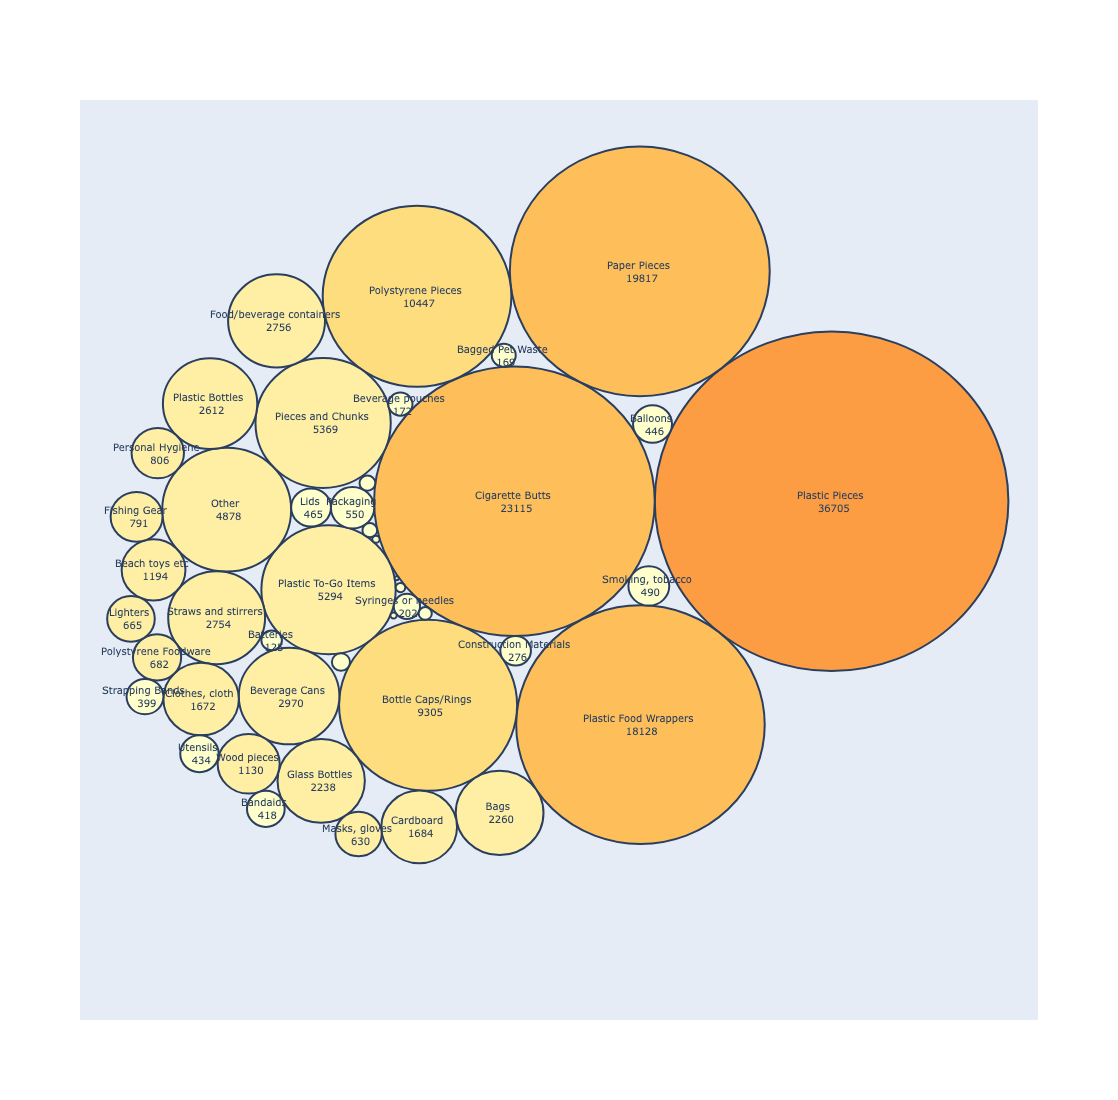

In [21]:
fig = go.Figure()
fig.data = []
# Set axes properties
fig.update_xaxes(
    range=[-1.05, 1.05], # making slightly wider axes than -1 to 1 so no edge of circles cut-off
    showticklabels=False,
    showgrid=False,
    zeroline=False
)

fig.update_yaxes(
    range=[-1.05, 1.05],
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

# Get some different colors
plot_colors = plotly.colors.sample_colorscale('ylorrd', samplepoints=10, low=0, high=1.0, colortype='rgb')

# add circles
for idx, circle in enumerate(circles):
    x, y, r = circle
    plot_color = plot_colors[int(round(r*10))]
    fig.add_shape(type="circle",
        xref="x",
        yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        fillcolor = plot_color,
        line_width=2,
    )
    nbr_items = int(col_sum.iloc[idx])
    # Text gets messy if circle is too small
    if nbr_items > 100:
        txt = "{} <br> {}".format(col_sum.index[idx], str(nbr_items))
        fig.add_annotation(
         x=x,
         y=y,
         text=txt,
         showarrow=False,
         font_size=10,
        )

fig.update_layout(
    autosize=False,
    width=1100,
    height=1100,
)
fig.show()

We can also plot the same data as a treemap with only one level in the hierarchy. For that we'll convert the Pandas series containing the sums back into a dataframe.

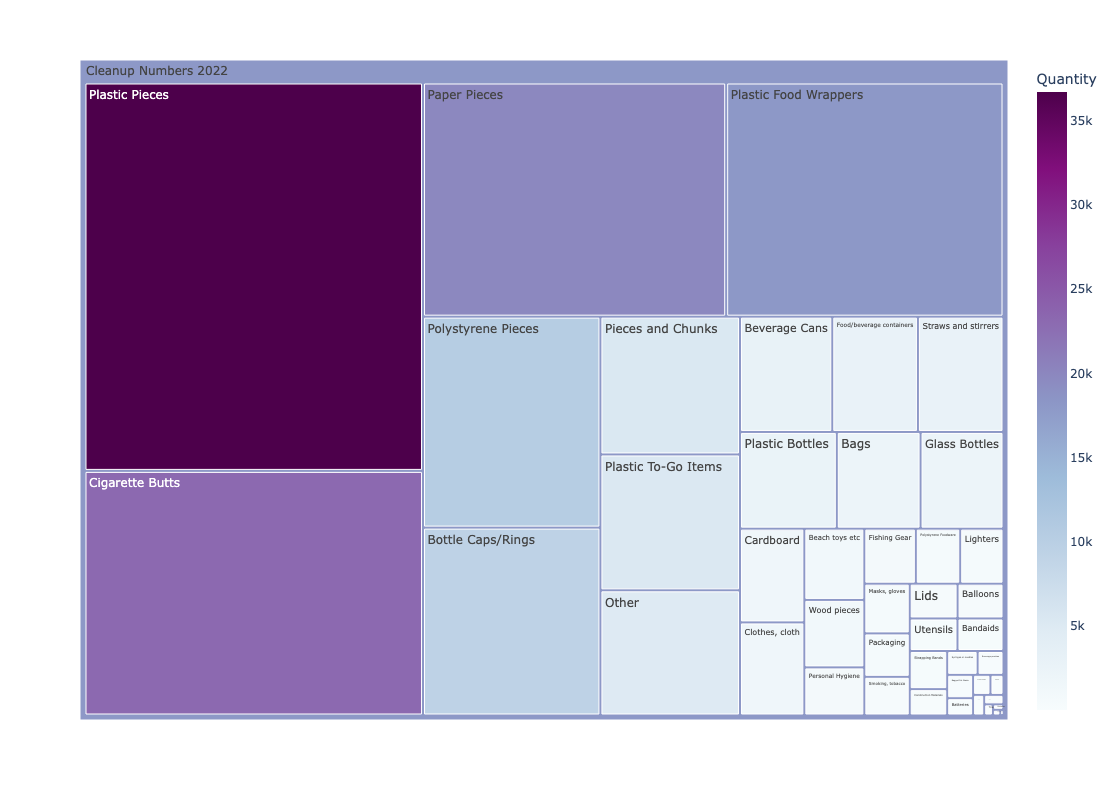

In [22]:
df_sum = pd.DataFrame({'Item' : col_sum.index, 'Quantity' : col_sum.values})

fig = px.treemap(df_sum, path=[px.Constant('Cleanup Numbers 2022'), 'Item'],
                 values='Quantity',
                 names='Item',
                 color='Quantity',
                 color_continuous_scale='bupu',
                )
fig.update_layout(
    autosize=False,
    width=1100,
    height=800,
)
fig.show()

## Cleanup Time Spent vs Amount of Trash Collected

Each event has a varying number of adult and youth volunteers, and number of hours spent cleaning up. Is the amount of trash collected related to the number of hours spent cleanding? Let's find out.

In [45]:
# Make a dataframe with dd total amount of trash and work hours to dataframe
df_total = df[['Cleanup Site/Sitio de limpieza',
 'Adult Volunteers',
 'Youth Volunteers',
 'Pounds of Trash',
 'Pounds of Recycling',
 'Total Cleanup Duration (hrs)']].copy()

df_total['Total Work Hours'] = \
    (df_total.fillna(0)['Adult Volunteers'] + df_total.fillna(0)['Youth Volunteers']) * \
    df_total.fillna(0)['Total Cleanup Duration (hrs)']
df_total['Youth Work Hours'] =  df_total.fillna(0)['Youth Volunteers'] * df_total.fillna(0)['Total Cleanup Duration (hrs)']
df_total['Adult Work Hours'] =  df_total.fillna(0)['Adult Volunteers'] * df_total.fillna(0)['Total Cleanup Duration (hrs)']
# Assuming here that recycling is weighed with trash for the rows where yellow fields are filled
df_total['Total Pounds of Trash'] = \
    df_total.fillna(0)['Pounds of Trash'] + df_total.fillna(0)['Pounds of Recycling']

There's something off with the values for the Garrapata State Beach 4/20 event: they worked 1260 h and collected 0.8 lbs of trash?
Remove this row for now.

In [46]:
idx = df_total[['Total Work Hours']].idxmax()
print(df_total.iloc[idx.iloc[0]])
df_total.drop([int(idx.iloc[0])], inplace=True)

Cleanup Site/Sitio de limpieza    Garrapata State Beach
Adult Volunteers                                     54
Youth Volunteers                                     36
Pounds of Trash                                    0.76
Pounds of Recycling                                0.03
Total Cleanup Duration (hrs)                       14.0
Total Work Hours                                 1260.0
Youth Work Hours                                  504.0
Adult Work Hours                                  756.0
Total Pounds of Trash                              0.79
Name: 62, dtype: object


It also seems a little suspicous that one short cleanup collected over 1000 lbs of trash so let's look at that.

In [47]:
idx = df[['Pounds of Trash']].idxmax()
outlier = df.iloc[idx.iloc[0]].copy()
outlier.drop(['Date of Cleanup Event/Fecha', 'Cleanup Site/Sitio de limpieza', 'County/City where the event was held?'], inplace=True)
outlier = outlier[outlier.ge(1, fill_value=0)]
outlier

Total Cleanup Duration (hrs)       3.0
Adult Volunteers                    24
Pounds of Trash                 1018.0
Cigarette Butts                      5
Plastic Bottles                  101.0
Straws and stirrers                  5
Glass Bottles                      100
Personal Hygiene                   9.0
Lids                              10.0
Utensils                          10.0
Beverage Cans                    100.0
Strapping Bands                    1.0
Tires                              2.0
Food/beverage containers           3.0
Bottle Caps/Rings                   50
Bags                              50.0
Name: 245, dtype: object

Most of the items are small but there are two tires collected. It still seems like a lot but I'm no expert on tire weight (maybe rims were included?) so I'll leave for now.

Several entries have 0 hours even though nbr of volunteers and amount of trash is non zero.
I do not want to include them in the plot.

In [48]:
df_total = df_total[df_total['Total Work Hours'] > 0]

Create a scatter plot to see if there's a correlation between work hours for adults/youths and pounds of trash/recycling.

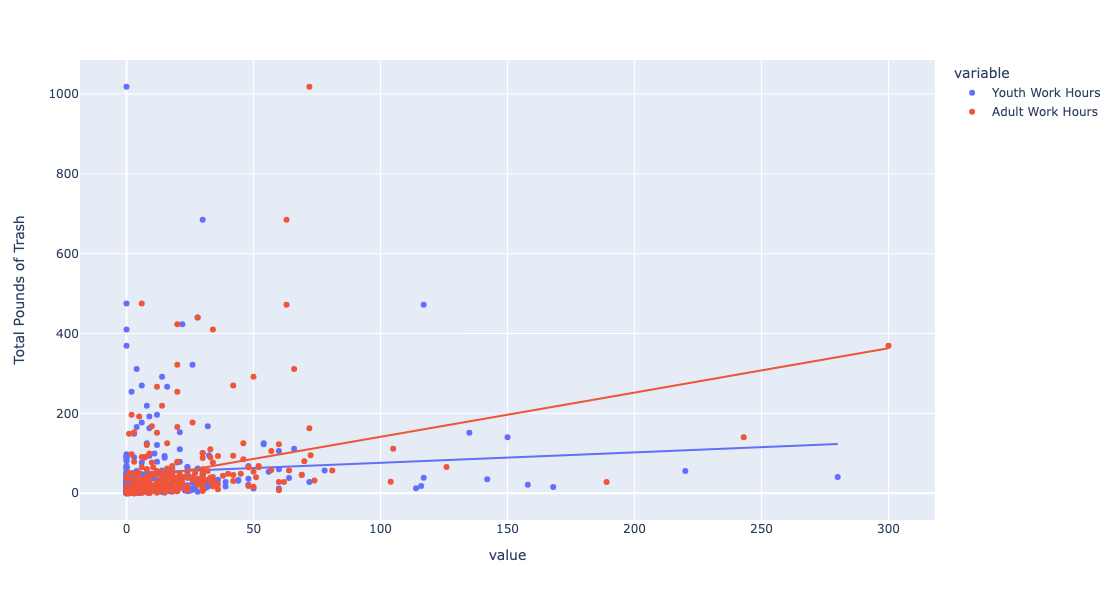

In [49]:
fig.data = []
fig = px.scatter(df_total, x=['Youth Work Hours', 'Adult Work Hours'], y='Total Pounds of Trash', trendline="ols")
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
)
fig.show()

Get coefficient of determination and p-value for youth and adult work hours vs amount of trash.

In [50]:
results = px.get_trendline_results(fig)

stats = [["", "Youth", "Adult"],
         ["R Squared", "", ""],
         ["p-value", "", ""],
         ["f(x)", "", ""]]

for idx in range(2):
    stats[1][idx + 1] = "{:.5f}".format(results.px_fit_results[idx].rsquared)
    stats[2][idx + 1] = "{:.5f}".format(results.px_fit_results[idx].pvalues[1])
    params = results.px_fit_results[idx].params
    stats[3][idx + 1] = "{:.1f}x + {:.1f}".format(params[1], params[0])

table = tabulate.tabulate(stats, tablefmt='html')
table

'<table>\n<tbody>\n<tr><td>         </td><td>Youth      </td><td>Adult      </td></tr>\n<tr><td>R Squared</td><td>0.00717    </td><td>0.10829    </td></tr>\n<tr><td>p-value  </td><td>0.15167    </td><td>0.00000    </td></tr>\n<tr><td>f(x)     </td><td>0.3x + 49.9</td><td>1.1x + 30.8</td></tr>\n</tbody>\n</table>'

There's a small but significant correlation between hours worked and pounds of trash collected for adults but not for youth.
'Youth' might include children as well as teenagers, so it makes sense that that group would collect less trash.
I don't want to draw any major conclusions based on the R squared values, it might be worth it to investigate a few more outliers first.

## Which Beaches Has Had the Most Trash Cleaned Up

It would be interesting to see where the most trash/recycling has been picked up. First thing to do is to check that the cleanup sites have a consistent naming convention.

In [51]:
beaches = df_total['Cleanup Site/Sitio de limpieza'].unique().tolist()
beaches.sort()
beaches

['20th Ave Beach & Corcoran Lagoon',
 '3-Mile State Beach',
 '4 Mile Beach',
 '4-Mile State Beach',
 'Andrew Molera State Park',
 'Ano Nuevo State Beach',
 'Arroyo Seco',
 'Asilomar State Beach',
 'Bay View Elementary School',
 'Bean Creek',
 'Beer Can Beach',
 'Blacks Beach',
 'Bonny Doon State Beach',
 'Capitola City Beach',
 'Carmel City Beach',
 'Carmel Meadows',
 'Carmel Meadows Beach',
 'Carmel River State Beach',
 'City of Santa Cruz-Center & Beach St',
 'City of Santa Cruz-Laurel & Bay',
 'Corcoran Lagoon @ 20th Ave',
 'Cowell Beach',
 'Cowell and Main Beach',
 'Cowell/Main Beach',
 'Davenport Landing Beach',
 'Davenport Main Beach',
 'De La Veaga Park',
 'De LaVeaga Elementary School',
 'Del Monte Beach at Wharf 2',
 'Del Monte Beach at Wharf II',
 'Del Monte Wharf 2',
 'Downtown Santa Cruz',
 'Elkhorn Slough',
 'Fort Ord Dunes State Beach',
 'Garrapata State Beach',
 'Gault Elementary School',
 'Greyhound Rock Beach',
 'Hidden Beach',
 "It's Beach/Lighthouse Field State Beach

I need to consult with Save Our Shores on which sites are unique vs duplicates. Right now I'll just make some assumptions and merge based on that.

In [52]:
row_names = {'4 Mile Beach':'4-Mile State Beach',
             'Carmel Meadows Beach': 'Carmel Meadows',
             'Cowell Beach': 'Cowell/Main Beach',
             'Cowell and Main Beach' : 'Cowell/Main Beach',
             'Davenport Main Beach' : 'Davenport Landing Beach',
             'Del Monte Beach at Wharf II' : 'Del Monte Beach at Wharf 2',
             'Del Monte Wharf 2' : 'Del Monte Beach at Wharf 2',
             'Marina State Beach at Reservation Rd' : 'Marina State Beach',
             "Mitchell's Cove Beach" : "Mitchell's Cove",
             'New Brighton Beach State Park' : 'New Brighton State Beach',
             'North Del Monte/Tide Avenue/Casa Verde Beach' : 'North Del Monte Tide Ave',
             'Palm Beach State Park' : 'Palm State Beach',
             'SLR @ Felton Covered Bridge ' : 'SLR @ Felton',
             'SLR @ Tannery ' : 'SLR @ The Tannery Arts Center',
             'Salinas River State Beach at Molera Rd.' : 'Salinas River State Beach',
             'Sand City Beach at West Bay St.' : 'Sand City Beach',
             'San Lorenzo River at Felker St. (HWY 1 overpass) to Soquel Ave' : 'SLR @ Felker to Soquel',
            }

df_total = df_total.set_index('Cleanup Site/Sitio de limpieza').rename_axis(None)
df_total.rename(index=row_names, inplace=True)
df_total['Cleanup Site'] = df_total.index
df_total.reset_index(drop=True)

Adult Volunteers  Youth Volunteers  Pounds of Trash  Pounds of Recycling  \
0                   2                 0             1.46                 0.03   
1                  17                 3            75.00                 2.00   
2                   1                 0            97.22                 0.45   
3                  10                 5             5.00                 0.00   
4                   7                 1            10.00                 3.00   
..                ...               ...              ...                  ...   
283                 2                 8            27.50                11.00   
284                 9                 0            33.00                 0.00   
285                 1                 0             1.00                 0.00   
286                15                15           101.00                 0.00   
287                 6                 2            26.00                 2.00   

     Total Cleanup Duration (hrs)  Total Work Hours  Youth Work Hours  \
0                             1.0               2.0               0.0   
1                             2.0              40.0               6.0   
2                             2.0               2.0               0.0   
3                             2.0              30.0              10.0   
4                             2.0              16.0               2.0   
..                            ...               ...               ...   
283                           2.0              20.0              16.0   
284                           2.0              18.0               0.0   
285                           3.5               3.5               0.0   
286                           2.0              60.0              30.0   
287                           2.0              16.0               4.0   

     Adult Work Hours  Total Pounds of Trash  \
0                 2.0                   1.49   
1                34.0                  77.00   
2                 2.0                  97.67   
3                20.0                   5.00   
4                14.0                  13.00   
..                ...                    ...   
283               4.0                  38.50   
284              18.0                  33.00   
285               3.5                   1.00   
286              30.0                 101.00   
287              12.0                  28.00   

                             Cleanup Site  
0                             Rodeo Creek  
1                       Scott Creek Beach  
2                         Monastery Beach  
3                          Carmel Meadows  
4                     Capitola City Beach  
..                                    ...  
283                      Moran Lake Beach  
284                     Carmel City Beach  
285  City of Santa Cruz-Center & Beach St  
286                          Hidden Beach  
287                     Carmel City Beach  

[288 rows x 10 columns]

I also shortened the column name 'Cleanup Site/Sitio de limpieza', which is a bit of a mouthful, to the shorter 'Cleanup Site'.
Now that names are consistent, we can group the data by location.

In [53]:
df_group = df_total.groupby('Cleanup Site').sum()
df_group = df_group.reset_index()

Let's plot a bar graph with amount of trash per cleanup site, and sort the values in descending order.

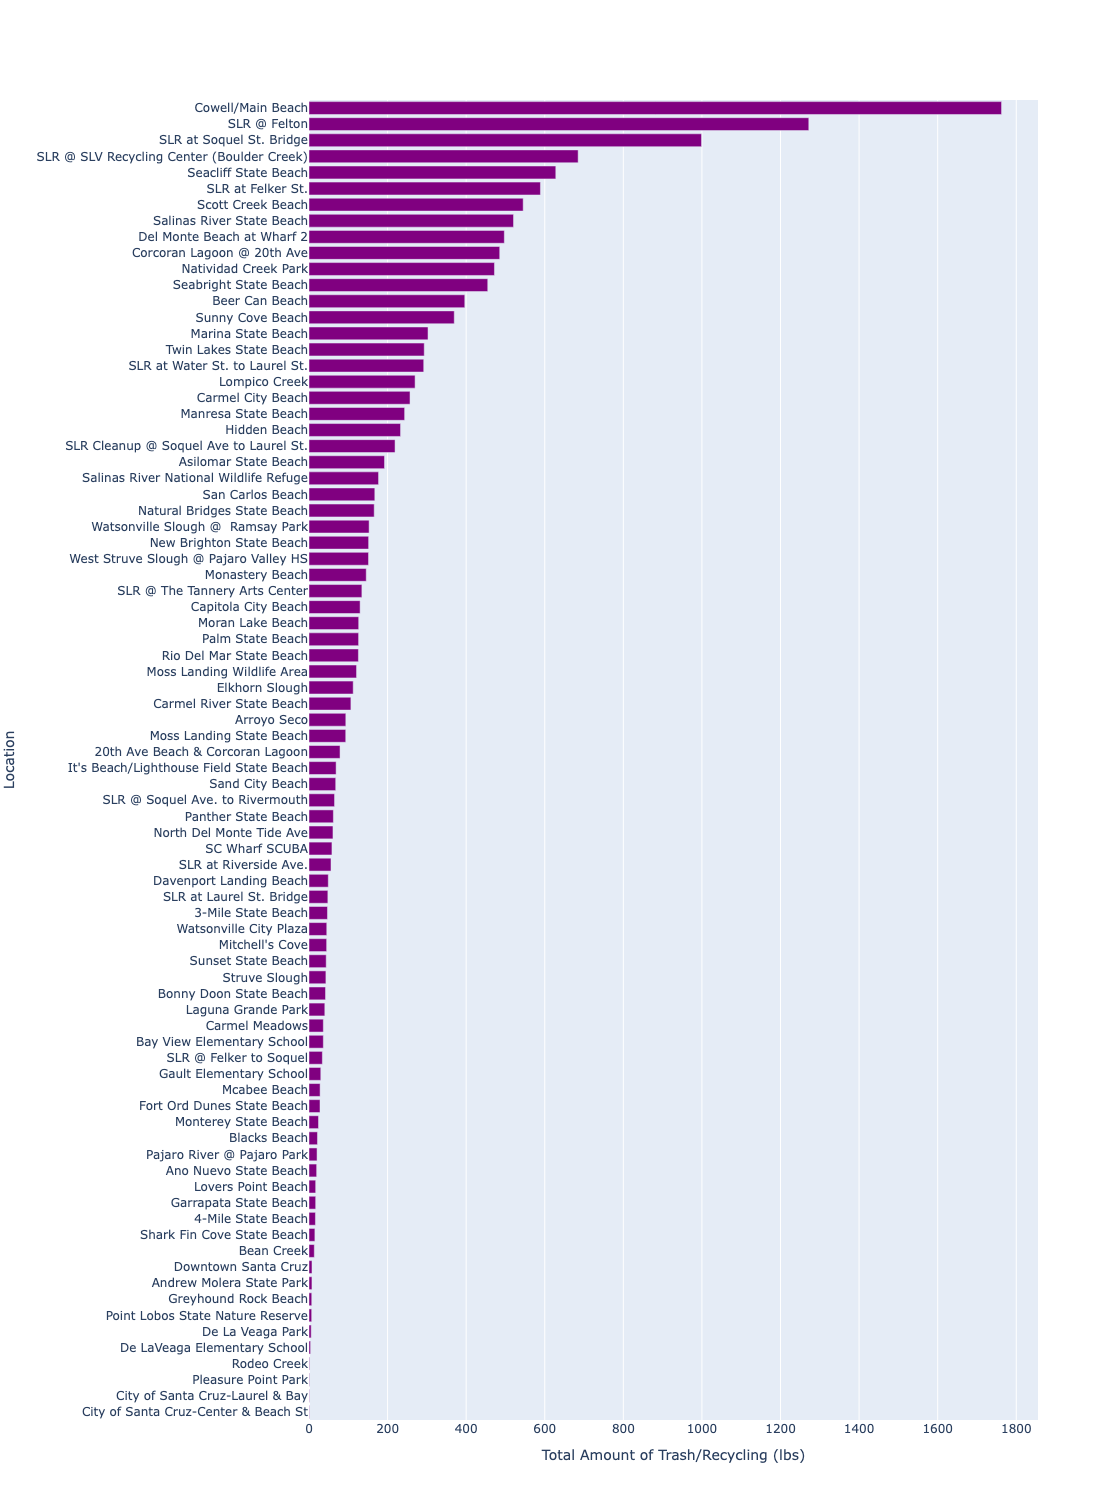

In [55]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=df_group['Cleanup Site'],
    x=df_group['Total Pounds of Trash'],
    orientation='h',
    marker_color='purple',
    name='Pounds of Trash',
))
fig.update_layout(
    autosize=False,
    width=1100,
    height=1500,
    yaxis_title='Location',
    xaxis_title='Total Amount of Trash/Recycling (lbs)',
    yaxis={'categoryorder':'total ascending'}
)
fig.show()

The most amount of trash by far has been collected at Cowell, which is also one of the most popular/touristy beaches in Santa Cruz.
We can also plot the total amount of time spent at each cleanup site in 2022.

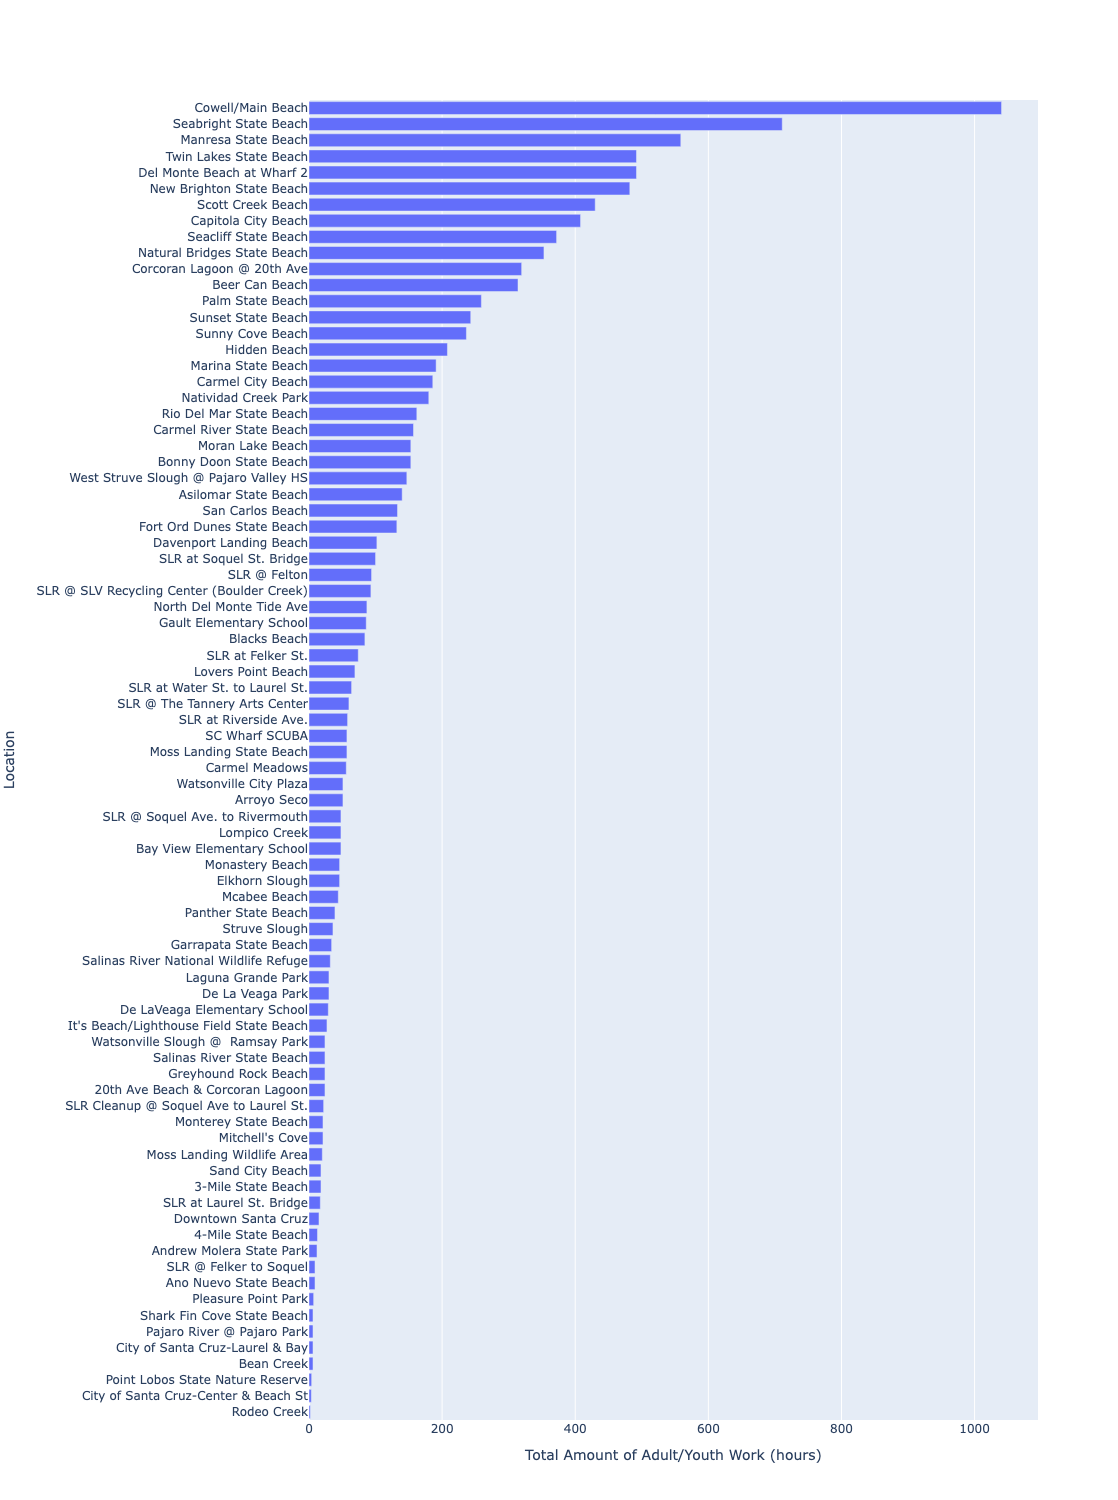

In [59]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=df_group['Cleanup Site'],
    x=df_group['Total Work Hours'],
    orientation='h',
    name='Total Cleanup Hours',
))
fig.update_layout(
    autosize=False,
    width=1100,
    height=1500,
    yaxis_title='Location',
    xaxis_title='Total Amount of Adult/Youth Work (hours)',
    yaxis={'categoryorder':'total ascending'}
)
fig.show()

Most of these graphs (except the circle packing) are interactive - you can hover over them to see the underlying data they represent. The data visualization package I'm using - Plotly - doesn't support circle packing but some interaction can probably be added if so desired.

Here I have plotted some of the (to me) most obvious graphs based on the 2022 cleanup data xlsx sheet, but I'm looking forward to hearing what Save Our Shores is interested in. Also, it will be interesting to explore longitudinal graphs if I get to see data from other years.